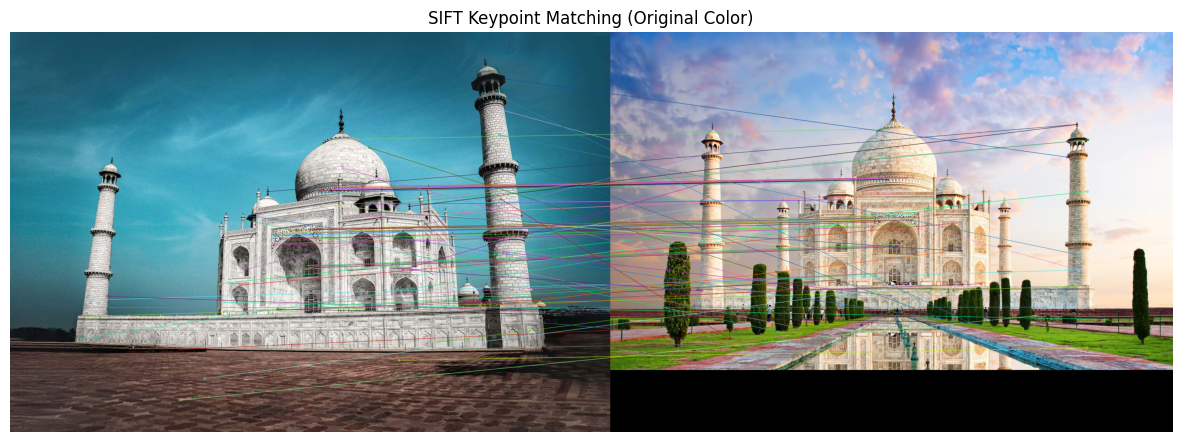

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Load color images with PIL and convert to RGB (for display)
img1_color = Image.open(r"C:\Users\ACER\Desktop\CV_TA-2\taj-1.jpg").convert('RGB')
img2_color = Image.open(r"C:\Users\ACER\Desktop\CV_TA-2\taj-2.jpg").convert('RGB')

# Convert to numpy arrays (OpenCV format: uint8)
img1_color_np = np.array(img1_color)
img2_color_np = np.array(img2_color)

# Convert to grayscale for SIFT processing
img1_gray = cv2.cvtColor(img1_color_np, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2_color_np, cv2.COLOR_RGB2GRAY)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1_gray, None)
kp2, des2 = sift.detectAndCompute(img2_gray, None)

# FLANN parameters and matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches on original color images
result_img = cv2.drawMatches(img1_color_np, kp1, img2_color_np, kp2, good_matches, None,
                             flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
plt.figure(figsize=(15, 10))
plt.imshow(result_img)
plt.title('SIFT Keypoint Matching (Original Color)')
plt.axis('off')
plt.show()
